<h2>Imports</h2>
<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scikit-Learn</li>
</ul>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import copy

# Scikit-Learn imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

<h2>Data loading & Preprocessing</h2>
<h4>Data loading</h4>
<ul>
    <li>Load data</li>
    <li>split train and test data</li>
</ul>
<h4>Preprocessing</h4>
<ul>
    <li>Categorical features</li>
    <li>Missing values</li>
    <li>Seperate labels from data</li>
    <li>Normalizing</li>
    <li>Eliminate correlated features</li>
</ul>
<p><b>NOTE:</b> Load data from 2019 & 2020 and concatnate them with each other</p>

In [2]:
# Load data 
data_2019 = pd.read_csv('.//Jan_2019_ontime.csv')
data_2020 = pd.read_csv('.//Jan_2020_ontime.csv')
data = pd.merge(data_2019, data_2020, how='outer')

# Drop unwanted column that created middle of merging procedure
data = data.drop(columns=['Unnamed: 21'])

<h4>Handle Categorical features</h4>
<p>1. Handle DES_TIME_BLK by spliting it into two seperate columns</p>

In [3]:
DEP_TIME_BLK_column = data['DEP_TIME_BLK']
DEP_no1 = []
DEP_no2 = []
for val in DEP_TIME_BLK_column:
    index = val.find('-')
    val1 = val[:index]
    val2 = val[index+1:]
    DEP_no1.append(copy.deepcopy(val1))
    DEP_no2.append(copy.deepcopy(val2))
data = data.drop(columns=['DEP_TIME_BLK'])
data = pd.concat([data, pd.DataFrame(DEP_no1, columns=['DES_TIME_BLK_no1']), pd.DataFrame(DEP_no2, columns=['DES_TIME_BLK_no2'])], axis=1)

<h4>Handle Categorical features</h4>
<p>2. Handle other categorical features by unique label coding strategy</p>

In [4]:
# Determine all the columns names that are categorical
categorical_columns = ['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST']

# Handle categorical features using label encoder
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

<h4>Missing values</h4>
<p><b>Strategy:</b> our strategy is to use the <b>mean</b> of the whole column and relace it with missing values</p>
<p><b>NOTE:</b> At first I wanted to apply <b>KNN</b> for handling missing values but for a data frame at sime about 1M x 22 it took so much time, but you can see the code below</p>

In [6]:
# Select your desired imputer
imputer = SimpleImputer(strategy='mean')
# imputer = KNNImputer(n_neighbors=5)

# Handle missing values
imputed_data = imputer.fit_transform(data)
data_without_missing_values = pd.DataFrame(imputed_data, columns=data.columns)
data = data_without_missing_values

In [7]:
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DES_TIME_BLK_no1,DES_TIME_BLK_no2
0,1.0,2.0,0.0,20363.0,0.0,4651.0,3280.0,11953.0,1195302.0,130.0,...,19.0,601.0,0.0,722.0,0.0,0.0,0.0,300.0,600.0,659.0
1,1.0,2.0,0.0,20363.0,0.0,1544.0,3281.0,13487.0,1348702.0,227.0,...,82.0,1359.0,0.0,1633.0,0.0,0.0,0.0,596.0,1400.0,1459.0
2,1.0,2.0,0.0,20363.0,0.0,4813.0,3282.0,11433.0,1143302.0,97.0,...,82.0,1215.0,0.0,1329.0,0.0,0.0,0.0,229.0,1200.0,1259.0
3,1.0,2.0,0.0,20363.0,0.0,4809.0,3283.0,15249.0,1524906.0,331.0,...,19.0,1521.0,0.0,1625.0,0.0,0.0,0.0,223.0,1500.0,1559.0
4,1.0,2.0,0.0,20363.0,0.0,4870.0,3284.0,10397.0,1039707.0,19.0,...,122.0,1847.0,0.0,1940.0,0.0,0.0,0.0,579.0,1900.0,1959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191326,31.0,5.0,0.0,20363.0,0.0,1429.0,4812.0,15412.0,1541205.0,342.0,...,97.0,1002.0,1.0,1128.0,1.0,0.0,0.0,443.0,700.0,759.0
1191327,31.0,5.0,0.0,20363.0,0.0,1224.0,4813.0,11433.0,1143302.0,97.0,...,172.0,1747.0,0.0,1933.0,0.0,0.0,0.0,509.0,1700.0,1759.0
1191328,31.0,5.0,0.0,20363.0,0.0,1221.0,4814.0,11996.0,1199603.0,137.0,...,191.0,554.0,0.0,752.0,0.0,0.0,0.0,610.0,600.0,659.0
1191329,31.0,5.0,0.0,20363.0,0.0,828.0,4815.0,10397.0,1039707.0,19.0,...,349.0,1714.0,0.0,1811.0,0.0,0.0,0.0,589.0,1700.0,1759.0


<h4>Seperate labels</h4>
<p><b>NOTE:</b> Labels are the combination of DEP_DEL15 & ARR_DEL15. I combined these two into 4 distinct labels (0, 1, 2, 3)</p>

In [15]:
data_labels = data[['DEP_DEL15', 'ARR_DEL15']]
labels = []
for _, val in data_labels.iterrows():
    if int(val['DEP_DEL15']) == 0 and int(val['ARR_DEL15']) == 0:
        labels.append(0)
    elif int(val['DEP_DEL15']) == 0 and int(val['ARR_DEL15']) == 1:
        labels.append(1)
    elif int(val['DEP_DEL15']) == 1 and int(val['ARR_DEL15']) == 0:
        labels.append(2)
    elif int(val['DEP_DEL15']) == 1 and int(val['ARR_DEL15']) == 1:
        labels.append(3)
    else:
        raise Exception("ERROR")
labels = pd.DataFrame(labels)

In [22]:
data = data.drop(columns=['DEP_DEL15', 'ARR_DEL15'])

In [16]:
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
1191326,3
1191327,0
1191328,0
1191329,0


<h4>Normalizing</h4>
<p><b>NOTE:</b> Method is to use standard normalization, that means to transform data to new values with mean of zero and standard deviation of 1</p>

In [24]:
scalar = StandardScaler()
normalized_data = pd.DataFrame(scalar.fit_transform(data), columns=data.columns)
data = normalized_data

<h4>Eliminate high correlated features</h4>
<ul>
    <li>Plot correlation matrix of data</li>
    <li>Recognize high correlated features</li>
    <li>Scale them down to fewer features</li>
</ul>
<p><b>NOTE:</b> This step will improve the final results and also the procedure of learning</p>

<h4>1. Correlation Matrix</h4>

<Axes: >

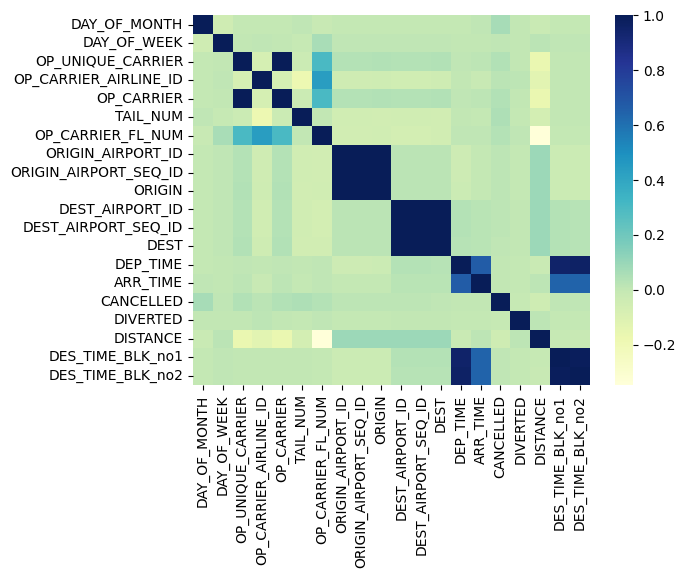

In [25]:
corr_mat = data.corr()
sb.heatmap(corr_mat, cmap='YlGnBu')

<h4>2. Conclusion</h4>
<p>As you can see in the heatmap of correlation matrix, below sets of features are highly correlated</p>
<ul>
    <li>OP_UNIQUE_CARRIER & OP_CARRIER</li>
    <li>ORIGIN_AIRPORT_ID & ORIGIN_AIRPORT_SEQ_ID & ORIGIN</li>
    <li>DEST_AIRPORT_ID & DEST_AIRPORT_SEQ_ID & DEST</li>
    <li>DES_TIME_BLK_no1 & DES_TIME_BLK_no2 & DEP_TIME</li>
</ul>
<p><b>NOTE:</b> Now we need to pick a method to scale down these sets of features, we could use <b>AutoEncoder</b> but shallow autoencoder does not provide good results and the input dimension is 3 or 2 so we can use <b>PCA</b> or <b>LDA</b> instead</p>

<h4>3. Scaling down</h4>
<b>Methods</b>
<ul>
    <li>PCA</li>
    <li>LDA</li>
    <li>AutoEncoder</li>
</ul>
<p><b>NOTE:</b> Before scaling down the data we seperate labels from training data</p>